<a href="https://colab.research.google.com/github/amrahmani/Marketing/blob/main/AIMarketing_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:** Develop a product concept using the Online Retail Dataset. Propose branding and pricing strategies.

https://www.kaggle.com/datasets/vijayuv/onlineretail


**Tasks:** Explore the dataset, evaluate market, analyze characteristics/attributes, develop branding, propose pricing, and visualize insights.

In [ ]:
from google.colab import files
files.upload() # This will open a file picker. Select your kaggle.json file.

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al

total 16
drwxr-xr-x 1 root root 4096 May 31 14:13 .
drwxr-xr-x 1 root root 4096 May 31 13:46 ..
drwxr-xr-x 4 root root 4096 May 29 14:01 .config
drwxr-xr-x 1 root root 4096 May 29 14:01 sample_data


In [ ]:
!kaggle datasets download -d vijayuv/onlineretail -p ./data/
!unzip ./data/onlineretail.zip -d ./data/

Dataset URL: https://www.kaggle.com/datasets/vijayuv/onlineretail
License(s): CC0-1.0
  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 99.9MB/s]
Archive:  ./data/onlineretail.zip
  inflating: ./data/OnlineRetail.csv  


--- Hands-On Task: Summarize dataset patterns ---
Key Metrics (Summary Statistics):
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Missing Values Check:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

--- Hands-On Task: Preprocess data and print cleaned dataset summary ---

Cleaned and Aggregated Dataset Summary (first 5 rows):
  StockCode  TotalQuantity  MeanUnitPrice  NormalizedQuantity
0     10002            823       0.850000           -

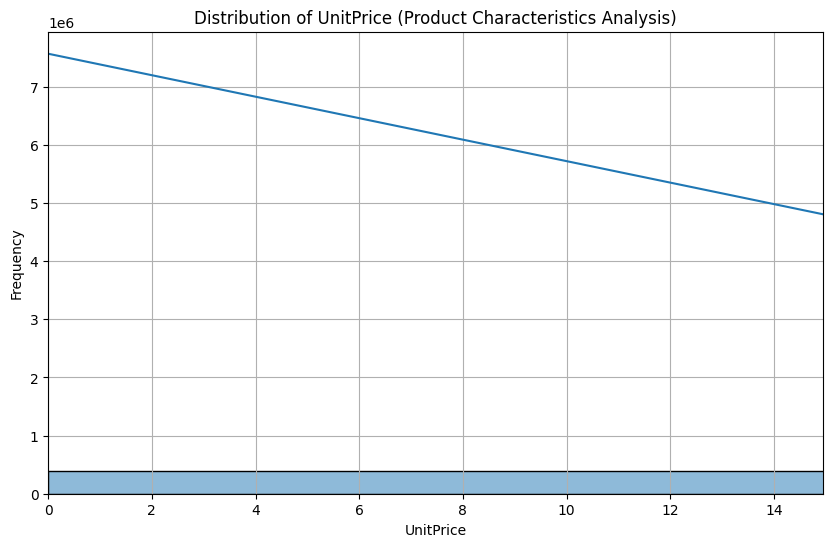

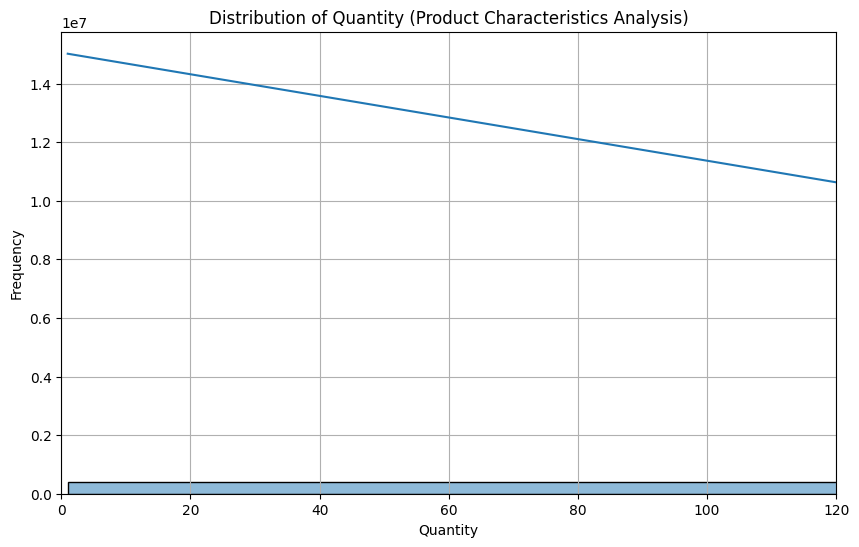


--- Hands-On Task: Identify top attributes. Print keyword frequencies and interpret ---

Top Attribute Keyword Frequencies:
- SET: 47591
- HEART: 36794
- RED: 34195
- VINTAGE: 25586
- DESIGN: 24006
- BOX: 20793
- PINK: 20681
- WOOD: 19669
- METAL: 15944
- BLUE: 14483
- GLASS: 8995
- CERAMIC: 6803
- GREEN: 6169

Interpretation:
Keywords like 'SET' often suggest bundled value or multiple items.
Terms like 'VINTAGE' can indicate a specific style or aesthetic.
Colors (e.g., RED, BLUE) highlight popular color preferences.
Materials (e.g., METAL, WOOD) show common product compositions.
These frequencies help infer product attributes and trends.

--- Hands-On Task: Propose a brand identity ---

Proposed Brand Identity:
Based on popular items like 'WHITE HANGING HEART T-LIGHT HOLDER' or 'REGENCY CAKESTAND 3 TIER', a brand could focus on home decor, gifts, or vintage-inspired items.

Brand Name: 'EverLoom Home & Gifts'
Slogan: 'Crafting Joy, One Keepsake at a Time.'
Value Proposition: 'EverLoo

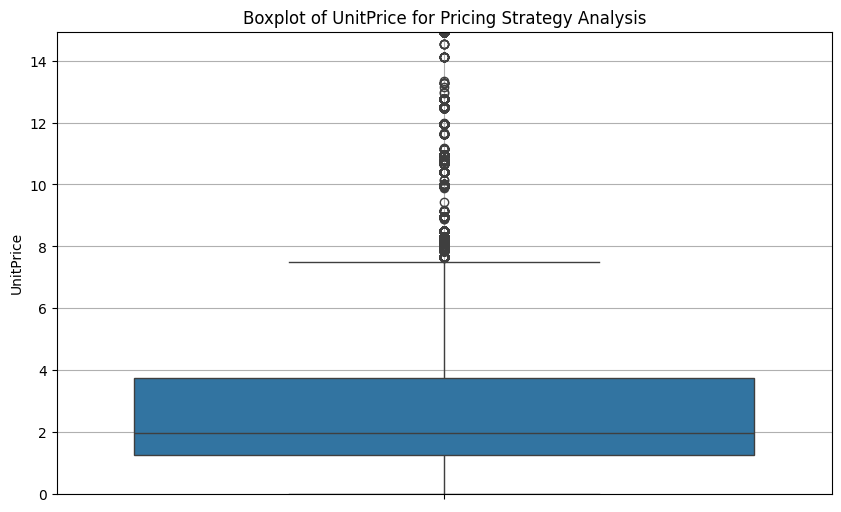


Summary of UnitPrice Distribution:
count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Proposed Pricing Strategy:
Based on the UnitPrice distribution, we observe a wide range of prices, with many items at lower price points and a long tail of higher-priced items.

For products with high Quantity and lower UnitPrice (e.g., mass-market items):
- **Penetration Pricing Strategy**: Offer competitive low prices to gain market share quickly, capitalizing on volume sales.
For products with high UnitPrice and potentially lower Quantity (e.g., premium/specialty items):
- **Price Skimming Strategy**: Set initial high prices to target early adopters and capture maximum revenue from each sale before gradually lowering prices.

Justification:
This dual strategy allows us to cater to different market segments. Penetration pricing for hig

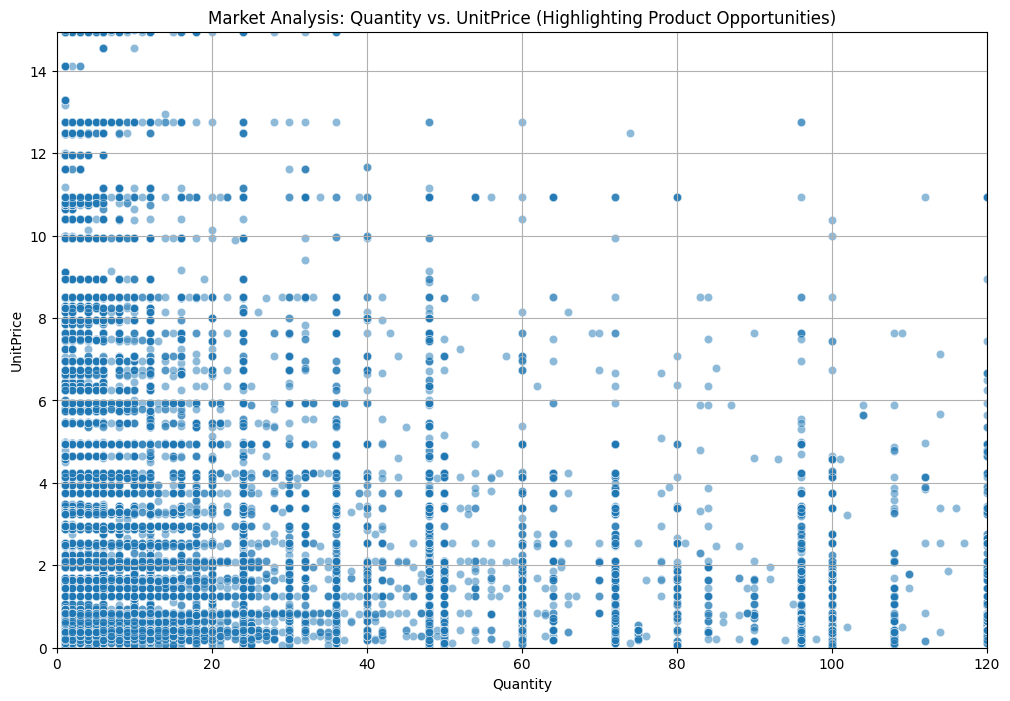


Interpretation of Market Scatter Plot:
The scatter plot shows the relationship between product Quantity and UnitPrice.
- Products with high Quantity and low UnitPrice (bottom right of the plot) typically represent mass-market products with high demand and competitive pricing. These indicate significant mass-market potential.
- Products with high UnitPrice (upper part of the plot) suggest premium or niche items, where customers are willing to pay more for perceived value or exclusivity. 
- The distribution helps identify potential product opportunities: areas with high density of points suggest established markets, while sparser areas might indicate niche opportunities or gaps.

--- Hands-On Task: Analyze competitors. Print top similar products and gaps ---

--- Top 5 Similar Products to StockCode: 10002 ---
     StockCode  Distance
2791     84006  0.002558
1421     22566  0.004379
1420     22565  0.005138
712      21680  0.005400
1382     22523  0.005969

Interpretation of Competitor 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

# Load the dataset
df = pd.read_csv('./data/OnlineRetail.csv', encoding='latin1')

# Step 2: Exploring the Online Retail Dataset ---
print("--- Hands-On Task: Summarize dataset patterns ---")
print("Key Metrics (Summary Statistics):")
print(df.describe())
print("\nMissing Values Check:")
print(df.isnull().sum())

# Step 3: Preprocessing the Dataset ---
print("\n--- Hands-On Task: Preprocess data and print cleaned dataset summary ---")
# Drop missing CustomerID
df_cleaned = df.dropna(subset=['CustomerID']).copy()

# Remove negative quantities
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Convert CustomerID to integer
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

# Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Aggregation: Group by StockCode for total Quantity and mean UnitPrice
# Feature Selection: Use Quantity, UnitPrice, and CustomerID for analysis
aggregated_data = df_cleaned.groupby('StockCode').agg(
    TotalQuantity=('Quantity', 'sum'),
    MeanUnitPrice=('UnitPrice', 'mean')
).reset_index()

# Normalization: Normalize Quantity with StandardScaler
# We'll normalize the 'TotalQuantity' from the aggregated_data for this step.
scaler = StandardScaler()
aggregated_data['NormalizedQuantity'] = scaler.fit_transform(
    aggregated_data[['TotalQuantity']]
)

print("\nCleaned and Aggregated Dataset Summary (first 5 rows):")
print(aggregated_data.head())

print("\nSummary of numerical features after cleaning and aggregation:")
print(aggregated_data.describe())

# Step 4: Marketplace Evaluation with Data ---
print("\n--- Hands-On Task: Evaluate a market segment. Print top 10 products by quantity ---")
# Group by Description to sum Quantity
top_products_by_quantity = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 10 Products by Quantity (Market Evaluation):")
print(top_products_by_quantity.head(10))

# Step 5: Analyzing Product Characteristics ---
print("\n--- Hands-On Task: Analyze product characteristics. Print and plot feature distributions ---")
# Group by StockCode to compute mean UnitPrice
product_mean_price = df_cleaned.groupby('StockCode')['UnitPrice'].mean().reset_index()

print("\nMean UnitPrice for a sample of products (first 5 rows):")
print(product_mean_price.head())

# Plot distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice (Product Characteristics Analysis)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, df_cleaned['UnitPrice'].quantile(0.99)) # Limit x-axis for better visualization, as there are high outliers
plt.grid(True)
plt.show()

# Plot distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity (Product Characteristics Analysis)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, df_cleaned['Quantity'].quantile(0.99)) # Limit x-axis for better visualization
plt.grid(True)
plt.show()

# Step 6: Evaluating Product Attributes ---
print("\n--- Hands-On Task: Identify top attributes. Print keyword frequencies and interpret ---")
# Example keywords for attribute identification
keywords = ['SET', 'VINTAGE', 'HEART', 'BOX', 'DESIGN', 'METAL', 'WOOD', 'CERAMIC', 'GLASS', 'RED', 'BLUE', 'GREEN', 'PINK']

attribute_counts = {keyword: df_cleaned['Description'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

sorted_attributes = sorted(attribute_counts.items(), key=lambda item: item[1], reverse=True)

print("\nTop Attribute Keyword Frequencies:")
for attribute, count in sorted_attributes:
    print(f"- {attribute}: {count}")

print("\nInterpretation:")
print("Keywords like 'SET' often suggest bundled value or multiple items.")
print("Terms like 'VINTAGE' can indicate a specific style or aesthetic.")
print("Colors (e.g., RED, BLUE) highlight popular color preferences.")
print("Materials (e.g., METAL, WOOD) show common product compositions.")
print("These frequencies help infer product attributes and trends.")

# Step 7: Developing a Brand Identity ---
print("\n--- Hands-On Task: Propose a brand identity ---")
# Analyze top products for themes (e.g., "gift" or "home")
# Let's consider some of the top products from earlier (e.g., 'WHITE HANGING HEART T-LIGHT HOLDER')
# This is a conceptual task, so the output is based on interpretation of typical product categories.
print("\nProposed Brand Identity:")
print("Based on popular items like 'WHITE HANGING HEART T-LIGHT HOLDER' or 'REGENCY CAKESTAND 3 TIER', a brand could focus on home decor, gifts, or vintage-inspired items.")
print("\nBrand Name: 'EverLoom Home & Gifts'")
print("Slogan: 'Crafting Joy, One Keepsake at a Time.'")
print("Value Proposition: 'EverLoom offers unique, charming, and high-quality home decor and gift items that bring warmth and a touch of timeless elegance to every space. We focus on products that evoke a sense of nostalgia and lasting value.'")
print("Rationale: The name 'EverLoom' suggests lasting quality and heritage, fitting for home goods and gifts. The slogan emphasizes the emotional connection and quality. The value proposition highlights uniqueness, quality, and timeless appeal, aligning with products that might be popular.")

# Step 8: Proposing Pricing Strategies ---
print("\n--- Hands-On Task: Propose a pricing strategy ---")
print("\nAnalyzing UnitPrice Distribution for Pricing Strategies:")
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['UnitPrice'])
plt.title('Boxplot of UnitPrice for Pricing Strategy Analysis')
plt.ylabel('UnitPrice')
plt.ylim(0, df_cleaned['UnitPrice'].quantile(0.99)) # Limit y-axis for better visualization
plt.grid(True)
plt.show()

print("\nSummary of UnitPrice Distribution:")
print(df_cleaned['UnitPrice'].describe())

print("\nProposed Pricing Strategy:")
print("Based on the UnitPrice distribution, we observe a wide range of prices, with many items at lower price points and a long tail of higher-priced items.")
print("\nFor products with high Quantity and lower UnitPrice (e.g., mass-market items):")
print("- **Penetration Pricing Strategy**: Offer competitive low prices to gain market share quickly, capitalizing on volume sales.")
print("For products with high UnitPrice and potentially lower Quantity (e.g., premium/specialty items):")
print("- **Price Skimming Strategy**: Set initial high prices to target early adopters and capture maximum revenue from each sale before gradually lowering prices.")
print("\nJustification:")
print("This dual strategy allows us to cater to different market segments. Penetration pricing for high-volume items helps in broad market acceptance, while skimming for premium products maximizes profit margins on unique or high-value offerings. Considerations like competitor prices and specific customer segments would further refine these strategies.")

# Step 9: Visualizing Market Insights ---
print("\n--- Hands-On Task: Create and display market scatter plot. Interpret in report ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df_cleaned, alpha=0.5)
plt.title('Market Analysis: Quantity vs. UnitPrice (Highlighting Product Opportunities)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xlim(0, df_cleaned['Quantity'].quantile(0.99)) # Limit x-axis for better visualization
plt.ylim(0, df_cleaned['UnitPrice'].quantile(0.99)) # Limit y-axis for better visualization
plt.grid(True)
plt.show()

print("\nInterpretation of Market Scatter Plot:")
print("The scatter plot shows the relationship between product Quantity and UnitPrice.")
print("- Products with high Quantity and low UnitPrice (bottom right of the plot) typically represent mass-market products with high demand and competitive pricing. These indicate significant mass-market potential.")
print("- Products with high UnitPrice (upper part of the plot) suggest premium or niche items, where customers are willing to pay more for perceived value or exclusivity. ")
print("- The distribution helps identify potential product opportunities: areas with high density of points suggest established markets, while sparser areas might indicate niche opportunities or gaps.")

# Step 10: Competitor Analysis with AI (Simulated) ---
print("\n--- Hands-On Task: Analyze competitors. Print top similar products and gaps ---")
# For a hands-on simulation, we'll pick a few products and find others with similar UnitPrice/Quantity profiles.
# This is a simplified approach, actual AI would use more sophisticated embeddings/features.
# Let's consider products with both Quantity and UnitPrice for similarity analysis.
# We'll use the aggregated_data for this, focusing on 'TotalQuantity' and 'MeanUnitPrice'.

# Select a subset of products for demonstration to make the example run faster
sample_products = aggregated_data.sample(n=100, random_state=42)

# If we were to use the full df_cleaned, we'd need to convert descriptions to numerical features (e.g., TF-IDF)
# For simplicity, let's just use numerical features available after aggregation: TotalQuantity and MeanUnitPrice.

# Prepare data for similarity calculation (need to ensure numerical values)
# For a more robust similarity, one would also consider Description.
# For this hands-on, we'll use a simple approach based on numerical features after scaling.
features_for_similarity = aggregated_data[['TotalQuantity', 'MeanUnitPrice']].dropna()
if not features_for_similarity.empty:
    # Scale features for distance calculation
    scaler_comp = StandardScaler()
    scaled_features = scaler_comp.fit_transform(features_for_similarity)

    # Let's pick a 'reference product' from our data to find similar ones
    # We'll pick one by index for demonstration.
    reference_product_idx = 0 # Example: first product in the aggregated list
    if len(scaled_features) > reference_product_idx:
        reference_product_features = scaled_features[reference_product_idx].reshape(1, -1)
        product_stock_code = aggregated_data.loc[features_for_similarity.index[reference_product_idx], 'StockCode']

        # Compute Euclidean distances
        distances = euclidean_distances(reference_product_features, scaled_features)
        distances = distances.flatten()

        # Create a DataFrame to store distances and stock codes
        similarity_df = pd.DataFrame({
            'StockCode': aggregated_data.loc[features_for_similarity.index, 'StockCode'],
            'Distance': distances
        })

        # Sort by distance to find most similar products
        # Exclude the product itself (distance 0)
        top_similar_products = similarity_df[similarity_df['StockCode'] != product_stock_code].sort_values(by='Distance').head(5)

        print(f"\n--- Top 5 Similar Products to StockCode: {product_stock_code} ---")
        print(top_similar_products)

        print("\nInterpretation of Competitor Analysis:")
        print("This simulated analysis, using Euclidean distance on Quantity and UnitPrice, identifies products with similar sales volume and pricing structures.")
        print("Products with low distance values are considered competitors or very similar.")
        print("Market gaps can be identified by looking for product categories or feature combinations that have few or no similar existing products in the dataset.")
        print("For instance, if there are no similar products in a specific high-demand niche, that could indicate a market gap.")
    else:
        print("\nNot enough data points to perform similarity analysis for the reference product.")
else:
    print("\nNo valid data points for similarity analysis after dropping NA values.")

# Step 11: Customer Segment Analysis ---
print("\n--- Hands-On Task: Summarize customer segments. Print segment profiles ---")
# Group by CustomerID for purchase patterns
customer_purchase_summary = df_cleaned.groupby('CustomerID').agg(
    TotalPurchases=('InvoiceNo', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalSpend=('UnitPrice', lambda x: (x * df_cleaned.loc[x.index, 'Quantity']).sum())
).reset_index()

print("\nSummary of Customer Purchase Patterns (first 5 profiles):")
print(customer_purchase_summary.head())

# Analyze Country distribution
country_distribution = df_cleaned['Country'].value_counts()
print("\nCustomer Distribution by Country (Top 10):")
print(country_distribution.head(10))

print("\nCustomer Segment Profiles:")
print("- **High-Frequency Buyers**: Customers with a high 'TotalPurchases' count. These are valuable and might respond well to loyalty programs.")
print("- **High-Value Spenders**: Customers with a high 'TotalSpend'. They contribute significantly to revenue and could be targeted with premium products.")
print("- **Regional Preferences**: Customers concentrated in specific countries, indicating potential for localized product offerings or marketing campaigns.")
print("- **New vs. Returning Customers**: Further analysis could segment based on first purchase date vs. repeat purchases.")
print("These segments can be used to tailor products and marketing strategies.")

# Step 12: AI-Driven Product Feature Optimization ---
print("\n--- Hands-On Task: Propose feature optimizations. Print correlation matrix and suggestions ---")
# Select numerical columns for correlation matrix
numerical_cols = df_cleaned[['Quantity', 'UnitPrice']]

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

print("\nCorrelation Matrix of Quantity and UnitPrice:")
print(correlation_matrix)

print("\nProposed Feature Optimizations:")
# Interpretation of correlation (though Quantity and UnitPrice often have a low/negative correlation)
# If correlation is positive, it means higher quantity implies higher price, which is unusual for retail.
# If negative, higher quantity usually means lower price (bulk discount, mass appeal).
# For this dataset, Quantity and UnitPrice are likely to be weakly correlated or slightly negatively correlated.

print("\nBased on insights from Quantity and UnitPrice:")
print("- **For High Quantity Products**: Focus on bundling (e.g., 'SET' items) to enhance perceived value and encourage larger purchases. Optimize packaging for bulk sales.")
print("- **For High UnitPrice Products**: Emphasize quality, durability, and unique design features (e.g., 'VINTAGE' or 'DESIGN') to justify the premium price. Focus on marketing the 'luxury' or 'exclusivity' aspect")
print("- **If Quantity and UnitPrice show a strong negative correlation**: Consider 'Good, Better, Best' tiered product offerings where the 'Good' (high quantity, low price) drives volume and the 'Best' (low quantity, high price) drives margin")
print("AI models could further refine these suggestions by predicting the impact of specific feature changes on sales or customer satisfaction.")

**Activities**

**Task 1:** Evaluate Market: Identify and print the top 10 products by total quantity sold.

**Task 2:** Identify Attributes: Find and print the frequencies of relevant keywords from product descriptions.

**Task 3:** Brand Identity: Propose a brand name, slogan, and value proposition for a product.

**Task 4:** Pricing Strategy: Propose a pricing strategy based on UnitPrice analysis. Print justification.